<a href="https://colab.research.google.com/github/CH3-C00H/CH3-C00H/blob/main/UAS%20JST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identitas Pembuat

Harun Al Rasyid

# Dataframe Preparation

In [2]:
import pandas as pd 
base_dir = "/tmp/IMDB Dataset.csv"
df = pd.read_csv(base_dir)

df_baru = df.head(5000)
df_baru = df_baru.replace("positive",1)
df_baru = df_baru.replace("negative",0)
df_baru

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
4995,An interesting slasher film with multiple susp...,0
4996,i watched this series when it first came out i...,1
4997,Once again Jet Li brings his charismatic prese...,1
4998,"I rented this movie, after hearing Chris Gore ...",0


# Validation and Testing Data 

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

review = df_baru["review"].values
label = df_baru["sentiment"].values
review_latih, review_test, label_latih, label_test = train_test_split(review, label, test_size=0.2)

tokenizer = Tokenizer(num_words=2500, oov_token='x')
tokenizer.fit_on_texts(review_latih) 
tokenizer.fit_on_texts(review_test)
 
 #Membuat bentuk larik
sekuens_latih = tokenizer.texts_to_sequences(review_latih)
sekuens_test = tokenizer.texts_to_sequences(review_test)

#Menyamakan panjang kalimat 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

# Modeling with Callback

Epoch 1/100
63/63 - 18s - loss: 0.6936 - accuracy: 0.5085 - val_loss: 0.6933 - val_accuracy: 0.4910 - 18s/epoch - 285ms/step
Epoch 2/100
63/63 - 12s - loss: 0.6929 - accuracy: 0.4983 - val_loss: 0.6916 - val_accuracy: 0.4910 - 12s/epoch - 189ms/step
Epoch 3/100
63/63 - 12s - loss: 0.6640 - accuracy: 0.5907 - val_loss: 0.5880 - val_accuracy: 0.7560 - 12s/epoch - 189ms/step
Epoch 4/100
63/63 - 12s - loss: 0.5404 - accuracy: 0.7797 - val_loss: 0.4920 - val_accuracy: 0.7790 - 12s/epoch - 190ms/step
Epoch 5/100
63/63 - 12s - loss: 0.4231 - accuracy: 0.8365 - val_loss: 0.4931 - val_accuracy: 0.7590 - 12s/epoch - 189ms/step
Epoch 6/100
63/63 - 12s - loss: 0.3297 - accuracy: 0.8852 - val_loss: 0.4387 - val_accuracy: 0.8040 - 12s/epoch - 188ms/step
Epoch 7/100
63/63 - 12s - loss: 0.2728 - accuracy: 0.9120 - val_loss: 0.4808 - val_accuracy: 0.7980 - 12s/epoch - 188ms/step
Epoch 8/100
63/63 - 12s - loss: 0.2347 - accuracy: 0.9225 - val_loss: 0.4934 - val_accuracy: 0.8020 - 12s/epoch - 188ms/step


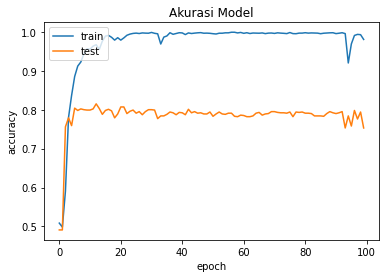

In [4]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(2500, 16, input_shape=[None],input_length = None ),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.9),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.8501 and logs.get('val_accuracy')>0.8501):
      print("\nAkurasi telah mencapai >85%!")
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(padded_latih, label_latih, epochs=100, validation_data=(padded_test, label_test), verbose=2 ,batch_size = 64, callbacks = [callbacks])


#Visualisasi
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Model Train

In [5]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(9000, 32, input_length= None),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True

callbacks = myCallback()

history = model.fit(padded_latih, label_latih, epochs=130, validation_data=(padded_test, label_test), verbose=3,callbacks = [callbacks])

Epoch 1/130
Epoch 2/130
Epoch 3/130
Epoch 4/130
Epoch 5/130
Epoch 6/130
Epoch 7/130
Epoch 8/130
Epoch 9/130
Epoch 10/130
Epoch 11/130
Epoch 12/130
Epoch 13/130
Epoch 14/130
Epoch 15/130
Epoch 16/130
Epoch 17/130
Epoch 18/130
Epoch 19/130
Epoch 20/130
Epoch 21/130
Epoch 22/130
Epoch 23/130
Epoch 24/130
Epoch 25/130
Epoch 26/130
Epoch 27/130
Epoch 28/130
Epoch 29/130
Epoch 30/130
Epoch 31/130
Epoch 32/130
Epoch 33/130
Epoch 34/130
Epoch 35/130
Epoch 36/130
Epoch 37/130
Epoch 38/130
Epoch 39/130
Epoch 40/130
Epoch 41/130
Epoch 42/130
Epoch 43/130
Epoch 44/130
Epoch 45/130
Epoch 46/130
Epoch 47/130
Epoch 48/130
Epoch 49/130
Epoch 50/130
Epoch 51/130
Epoch 52/130
Epoch 53/130
Epoch 54/130
Epoch 55/130
Epoch 56/130
Epoch 57/130
Epoch 58/130
Epoch 59/130
Epoch 60/130
Epoch 61/130
Epoch 62/130
Epoch 63/130
Epoch 64/130
Epoch 65/130
Epoch 66/130
Epoch 67/130
Epoch 68/130
Epoch 69/130
Epoch 70/130
Epoch 71/130
Epoch 72/130
Epoch 73/130
Epoch 74/130
Epoch 75/130
Epoch 76/130
Epoch 77/130
Epoch 78

Epoch 1/100
63/63 - 17s - loss: 0.6761 - accuracy: 0.5872 - val_loss: 0.6460 - val_accuracy: 0.7150 - 17s/epoch - 275ms/step
Epoch 2/100
63/63 - 12s - loss: 0.5946 - accuracy: 0.7157 - val_loss: 0.5820 - val_accuracy: 0.7010 - 12s/epoch - 190ms/step
Epoch 3/100
63/63 - 12s - loss: 0.4271 - accuracy: 0.8150 - val_loss: 0.4436 - val_accuracy: 0.7940 - 12s/epoch - 189ms/step
Epoch 4/100
63/63 - 12s - loss: 0.2737 - accuracy: 0.8930 - val_loss: 0.4373 - val_accuracy: 0.8020 - 12s/epoch - 189ms/step
Epoch 5/100
63/63 - 12s - loss: 0.2020 - accuracy: 0.9240 - val_loss: 0.4723 - val_accuracy: 0.8210 - 12s/epoch - 190ms/step
Epoch 6/100
63/63 - 12s - loss: 0.1795 - accuracy: 0.9342 - val_loss: 0.5296 - val_accuracy: 0.7960 - 12s/epoch - 189ms/step
Epoch 7/100
63/63 - 12s - loss: 0.1361 - accuracy: 0.9517 - val_loss: 0.5961 - val_accuracy: 0.7980 - 12s/epoch - 188ms/step
Epoch 8/100
63/63 - 12s - loss: 0.1267 - accuracy: 0.9532 - val_loss: 0.6157 - val_accuracy: 0.7950 - 12s/epoch - 190ms/step


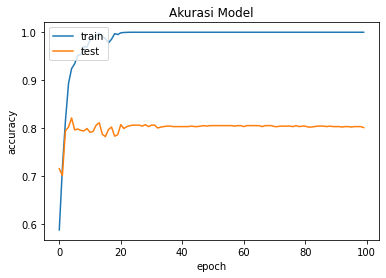

In [6]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 32, input_length = None ),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.8501 and logs.get('val_accuracy')>0.8501):
      print("\nAkurasi telah mencapai >85%!")
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(padded_latih, label_latih, epochs=100, validation_data=(padded_test, label_test), verbose=2 ,batch_size = 64, callbacks = [callbacks])


#Visualisasi Model
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
